In [1]:
import numpy as np
import pickle

In [2]:
def unpickle(file):  # A
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d
                                      
def load_cifar(filenames):
    training_images = []
    training_labels = []

    for file_name in filenames:
        unpickled_images = unpickle(file_name)
        images, labels = unpickled_images[b'data'], unpickled_images[b'labels']  # B
        images = np.reshape(images,(-1, 3, 32, 32))  # C
        images = np.transpose(images, (0, 2, 3, 1))  # C
        training_images.append(images)
        training_labels += labels

    return np.vstack(training_images), training_labels

print("Loading the training set")
training_files = [f'../data/cifar-10/data_batch_{i}' for i in range(1, 6)]  # D
training_images, int_training_labels = load_cifar(training_files)  # D

print("Loading the testing set")
training_files = ['../data/cifar-10/test_batch']  # D
testing_images, int_testing_labels = load_cifar(training_files)  # D

print("Loading the labels")
label_names = unpickle('../data/cifar-10/batches.meta')[b'label_names']  # E
training_labels = [str(label_names[_]) for _ in int_training_labels]
testing_labels = [str(label_names[_]) for _ in int_testing_labels]

# A function to load the files from the main CIFAR site
# B Grab the images and labels from the files
# C reshape and transpose so our shape is (number_of_images, height, width, channels (RGB))
# D Load up the training and testing images
# E Load up the labels

Loading the training set
Loading the testing set
Loading the labels


In [3]:
', '.join([l.decode() for l in label_names])

'airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck'

b'frog'


Text(0.5, 1.0, "b'frog'")

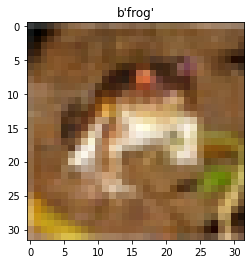

In [4]:
import matplotlib.pyplot as plt
print(training_labels[0])
plt.imshow(training_images[0])
plt.title(training_labels[0])

b'cat'


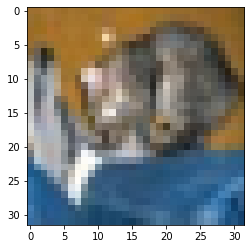

In [5]:
print(testing_labels[0])
plt.imshow(testing_images[0])

In [6]:
training_images.shape

(50000, 32, 32, 3)

In [7]:
training_images[0][0, 0]  # RGB values of the top left pixel

array([59, 62, 63], dtype=uint8)

In [8]:
avg_training_images = training_images.mean(axis=3).reshape(50000,-1)  # A
avg_testing_images = testing_images.mean(axis=3).reshape(10000,-1)  # A

print(avg_training_images.shape)

# A average the RGB values together and reshape to make a 1D vector for each image. 
# The shapes went from (50000, 32, 32, 3) --> (50000, 1024) == (50000, 32 * 32)

(50000, 1024)


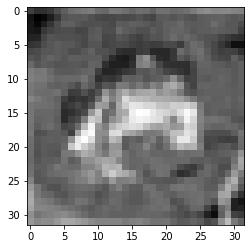

In [9]:
plt.imshow(training_images.mean(axis=3)[0], cmap='gray')

In [10]:
%run ./Base.ipynb

In [11]:
from sklearn.pipeline import Pipeline  # A
from sklearn.linear_model import LogisticRegression  # A

clf = LogisticRegression(max_iter=100, solver='saga')  # B

ml_pipeline = Pipeline([  # C
    ('classifier', clf)
])

params = {  # C
    'classifier__C': [1e-1, 1e0, 1e1]
}

print("Average Pixel Value + LogReg\n==========================")
advanced_grid_search(   # D 
    avg_training_images, training_labels, avg_testing_images, testing_labels, 
    ml_pipeline, params
)

# A import ML packages
# B Instantiate our simple Logistic Regression model
# C Set up our simple grid search pipeline to try three different values for the LogReg model
# D Run our grid search to get an accuracy value for our pipeline

Average Pixel Value + LogReg


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergence

               precision    recall  f1-score   support

  b'airplane'       0.23      0.27      0.25      1000
b'automobile'       0.34      0.35      0.35      1000
      b'bird'       0.23      0.19      0.20      1000
       b'cat'       0.19      0.15      0.17      1000
      b'deer'       0.20      0.13      0.16      1000
       b'dog'       0.26      0.30      0.28      1000
      b'frog'       0.25      0.22      0.23      1000
     b'horse'       0.26      0.23      0.25      1000
      b'ship'       0.28      0.38      0.32      1000
     b'truck'       0.36      0.41      0.38      1000

     accuracy                           0.26     10000
    macro avg       0.26      0.26      0.26     10000
 weighted avg       0.26      0.26      0.26     10000

Best params: {'classifier__C': 10.0}
Overall took 1373.19 seconds


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(Pipeline(steps=[('classifier', LogisticRegression(C=10.0, solver='saga'))]),
 array(["b'frog'", "b'truck'", "b'ship'", ..., "b'dog'", "b'dog'",
        "b'dog'"], dtype='<U13'))

(1568,)


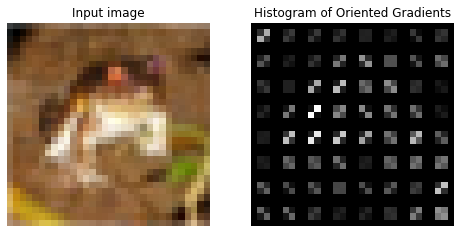

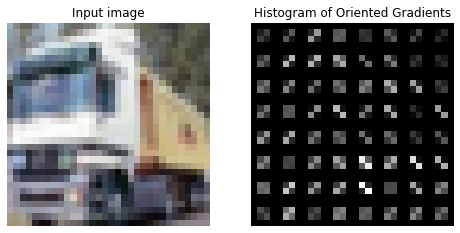

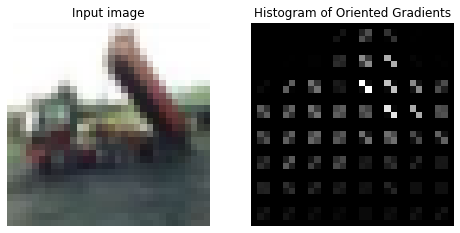

In [20]:
# derived from https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

from skimage.feature import hog  # A
from skimage import data, exposure  # A
from skimage.transform import resize  # A

for image in training_images[:3]:

    hog_features, hog_image = hog(  # B
        image,
        orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True,
        channel_axis=-1, transform_sqrt=True, block_norm='L2-Hys')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)  # C

    ax1.axis('off')  # C
    ax1.imshow(image, cmap=plt.cm.gray)  # C
    ax1.set_title('Input image')  # C

    ax2.axis('off')  # C
    ax2.imshow(hog_image, cmap=plt.cm.gray)  # C
    ax2.set_title('Histogram of Oriented Gradients')  # C
    
print(hog_features.shape)  # D
plt.show()

# A Import functions from scikit-image
# B Calculate HOG for 3 of our training images
# C Plot the HOG next to the original images
# D the size of the feature vector

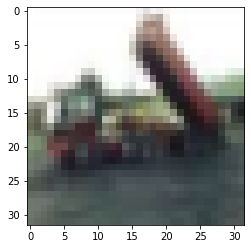

In [21]:
plt.imshow(image, interpolation='nearest')

(1568,) (32, 32)


Text(0.5, 1.0, 'Histogram of Oriented Gradients')

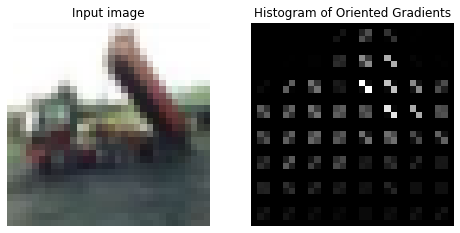

In [22]:
hog_features, hog_image = hog(  # B
        image,
        orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True,
        channel_axis=-1, transform_sqrt=True, block_norm='L2-Hys')

print(hog_features.shape, hog_image.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)  # C

ax1.axis('off')  # C
ax1.imshow(image, cmap=plt.cm.gray)  # C
ax1.set_title('Input image')  # C

ax2.axis('off')  # C
ax2.imshow(hog_image, cmap=plt.cm.gray)  # C
ax2.set_title('Histogram of Oriented Gradients')  # C


In [23]:
image.shape

(32, 32, 3)

In [24]:
np.round(hog_features, 2)[:50]

array([0.29, 0.  , 0.  , 0.  , 0.34, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.34, 0.  , 0.  , 0.  , 0.29, 0.  , 0.  , 0.3 , 0.34, 0.34,
       0.21, 0.  , 0.19, 0.  , 0.34, 0.  , 0.29, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.33, 0.  , 0.  , 0.  , 0.11, 0.  ])

In [25]:
hog_features.reshape(196, 8)[1]

array([0.        , 0.        , 0.        , 0.        , 0.33982944,
       0.        , 0.        , 0.        ])

In [26]:
hog_image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01176482, 0.00588048, ..., 0.01568643, 0.        ,
        0.        ],
       [0.        , 0.00588048, 0.01176482, ..., 0.        , 0.01568643,
        0.        ],
       ...,
       [0.        , 0.2136848 , 0.47131788, ..., 0.09614047, 0.46262604,
        0.        ],
       [0.        , 0.47131788, 0.2136848 , ..., 0.46262604, 0.09614047,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
from tqdm import tqdm   # A

def calculate_hogs(images):  # B
    hog_descriptors = []
    for image in tqdm(np.sqrt(images)):
        hog_descriptors.append(hog(
            image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), 
            channel_axis=-1, transform_sqrt=True, block_norm='L2-Hys', visualize=False
        ))

    return np.squeeze(hog_descriptors)

hog_training = calculate_hogs(training_images)
hog_testing = calculate_hogs(testing_images)

# A tqdm will give us a progress bar so we can see how long it takes to calculate our HOGs
# B function to calculate HOGs for a set of images

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1303.81it/s]


In [28]:
hog_training.shape

(50000, 1568)

In [29]:
hog_testing.shape

(10000, 1568)

In [30]:
print("HOG + LogReg\n=====================")
advanced_grid_search(
    hog_training, training_labels, hog_testing, testing_labels, 
    ml_pipeline, params
)

HOG + LogReg


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergence

               precision    recall  f1-score   support

  b'airplane'       0.61      0.60      0.61      1000
b'automobile'       0.68      0.69      0.68      1000
      b'bird'       0.43      0.37      0.40      1000
       b'cat'       0.42      0.35      0.39      1000
      b'deer'       0.47      0.50      0.49      1000
       b'dog'       0.47      0.45      0.46      1000
      b'frog'       0.56      0.69      0.62      1000
     b'horse'       0.58      0.60      0.59      1000
      b'ship'       0.64      0.65      0.64      1000
     b'truck'       0.69      0.71      0.70      1000

     accuracy                           0.56     10000
    macro avg       0.56      0.56      0.56     10000
 weighted avg       0.56      0.56      0.56     10000

Best params: {'classifier__C': 0.1}
Overall took 1549.08 seconds


(Pipeline(steps=[('classifier', LogisticRegression(C=0.1, solver='saga'))]),
 array(["b'dog'", "b'ship'", "b'automobile'", ..., "b'cat'",
        "b'automobile'", "b'horse'"], dtype='<U13'))

Text(0, 0.5, '% of Explained Variance')

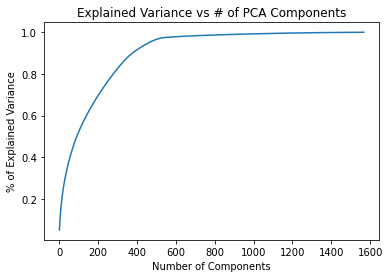

In [31]:
from sklearn.decomposition import PCA  # A

num_hog_features = hog_training.shape[1]  # B

p = PCA(n_components=num_hog_features)  # C
p.fit(hog_training)  # C

plt.plot(p.explained_variance_ratio_.cumsum())  # D
plt.title('Explained Variance vs # of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('% of Explained Variance')

# A import our Principcal Component Analysis module
# B Number of features from the original HOG transformation
# C Fit the PCA module to the HOG matrix
# D Visualize the cumulative explained variance

In [32]:
explained_variance = p.explained_variance_ratio_.cumsum()

for i in [10, 100, 200, 400]:
    print(f'The explained variance using {i} components is {explained_variance[i - 1]}')

The explained variance using 10 components is 0.17028406262397766
The explained variance using 100 components is 0.5219486355781555
The explained variance using 200 components is 0.6963599920272827
The explained variance using 400 components is 0.9156585335731506


In [33]:
p = PCA(n_components=600)  # A

hog_training_pca = p.fit_transform(hog_training)  # B
hog_testing_pca = p.transform(hog_testing)  # B

print("HOG + PCA + LogReg\n=====================")
advanced_grid_search(  # C
    hog_training_pca, training_labels, hog_testing_pca, testing_labels, 
    ml_pipeline, params
)

# A Choose to extract 600 new features
# B Transform the original HOG features to the reduced space
# C Get accuracy for reduced HOG features

HOG + PCA + LogReg


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


               precision    recall  f1-score   support

  b'airplane'       0.60      0.60      0.60      1000
b'automobile'       0.68      0.68      0.68      1000
      b'bird'       0.44      0.37      0.40      1000
       b'cat'       0.42      0.35      0.39      1000
      b'deer'       0.47      0.50      0.48      1000
       b'dog'       0.48      0.45      0.46      1000
      b'frog'       0.55      0.68      0.61      1000
     b'horse'       0.58      0.59      0.58      1000
      b'ship'       0.63      0.64      0.63      1000
     b'truck'       0.68      0.70      0.69      1000

     accuracy                           0.56     10000
    macro avg       0.55      0.56      0.55     10000
 weighted avg       0.55      0.56      0.55     10000

Best params: {'classifier__C': 0.1}
Overall took 463.00 seconds


(Pipeline(steps=[('classifier', LogisticRegression(C=0.1, solver='saga'))]),
 array(["b'dog'", "b'ship'", "b'truck'", ..., "b'cat'", "b'automobile'",
        "b'horse'"], dtype='<U13'))

In [34]:
import torchvision.models as models
import torch.nn as nn

vgg_model = models.vgg11(pretrained='imagenet')  # A

normalized_training_images = ((training_images/255) - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]  # B
normalized_testing_images = ((testing_images/255) - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]  # B

# A Instantiate a VGG-11 Model pretrained on the imagenet corpus
# B Normalize the raw images using values from the original paper

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /Users/sinanozdemir/.cache/torch/hub/checkpoints/vgg11-bbd30ac9.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [35]:
import torch
from torch.utils.data import TensorDataset, DataLoader

training_images_tensor = torch.Tensor(normalized_training_images.transpose(0, 3, 1, 2))  # A
training_labels_tensor = torch.Tensor(int_training_labels).type(torch.LongTensor)  # A

training_dataset = TensorDataset(training_images_tensor, training_labels_tensor)  # A
training_dataloader = DataLoader(training_dataset, shuffle=True, batch_size=2048)  # A


testing_images_tensor = torch.Tensor(normalized_testing_images.transpose(0, 3, 1, 2))  # B
testing_labels_tensor = torch.Tensor(int_testing_labels).type(torch.LongTensor)  # B

testing_dataset = TensorDataset(testing_images_tensor, testing_labels_tensor)  # B
testing_dataloader = DataLoader(testing_dataset, shuffle=True, batch_size=2048)  # B

# A Transform the normalized training image data into a Pytorch DataLoader
# B Transform the normalized testing image data into a Pytorch DataLoader

In [36]:
from tqdm import tqdm

def get_vgg_features(feature_extractor):
    print("Extracting features for training set")
    extracted_training_images = []
    shuffled_training_labels = []
    for batch_idx, (data_, target_) in tqdm(enumerate(training_dataloader)):
        extracted_training_images.append(feature_extractor(data_).detach().numpy().squeeze((2, 3)))
        shuffled_training_labels += target_

    print("Extracting features for testing set")
    extracted_testing_images = []
    shuffled_testing_labels = []
    for batch_idx, (data_, target_) in tqdm(enumerate(testing_dataloader)):
        extracted_testing_images.append(feature_extractor(data_).detach().numpy().squeeze((2, 3)))
        shuffled_testing_labels += target_

    return np.vstack(extracted_training_images), shuffled_training_labels, np.vstack(extracted_testing_images), shuffled_testing_labels
        

In [37]:
vgg_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [38]:
transformed_training_images, shuffled_training_labels, transformed_testing_images, shuffled_testing_labels = get_vgg_features(vgg_model.features)  # A

print("VGG11(Imagenet) + LogReg\n=====================")
advanced_grid_search(
    transformed_training_images, shuffled_training_labels, # B
    transformed_testing_images, shuffled_testing_labels,   # B
    ml_pipeline, params
)

# A extract features from the VGG-11 Model
# B We needed to re-extract the training labels because the dataloader will shuffle the points around

Extracting features for training set


25it [01:35,  3.82s/it]


Extracting features for testing set


5it [00:19,  3.83s/it]


VGG11(Imagenet) + LogReg


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergence

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.76      0.79      0.77      1000
           2       0.63      0.57      0.60      1000
           3       0.56      0.53      0.54      1000
           4       0.63      0.66      0.64      1000
           5       0.69      0.64      0.66      1000
           6       0.70      0.78      0.74      1000
           7       0.71      0.72      0.71      1000
           8       0.76      0.76      0.76      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Best params: {'classifier__C': 0.1}
Overall took 596.99 seconds


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(Pipeline(steps=[('classifier', LogisticRegression(C=0.1, solver='saga'))]),
 array([6, 0, 3, ..., 7, 9, 4]))

In [39]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  # A

fine_tuned_vgg_model = models.vgg11(pretrained='imagenet')  # B

fine_tuned_vgg_model.classifier[-1].out_features = 10  # C

for layer in fine_tuned_vgg_model.classifier:  # D
    if hasattr(layer, 'weight'):  # D
        torch.nn.init.xavier_uniform_(layer.weight)  # D
    if hasattr(layer, 'bias'):  # D
        nn.init.constant_(layer.bias.data, 0)  # D

# A set device to either cuda or cpu
# B instantiate a new VGG model
# C Change the final classifier layer to output 10 classes instead of 1,000
# D Randomize all parameters in the classifier to start fresh

In [40]:
import torch.optim as optim  # A

criterion = nn.CrossEntropyLoss()  # A
optimizer = optim.SGD(fine_tuned_vgg_model.parameters(), lr=0.01, momentum=0.9)  # A

n_epochs = 15  # A
print_every = 10  # A
valid_loss_min = np.Inf  # A
total_step = len(training_dataloader)  # A

train_loss, val_loss, train_acc, val_acc = [], [], [], []  # B


# A Set our training parameters (parameter tuning happened off-screen)
# B Initialize lists to keep track of loss and accuracy

In [41]:
# code inspired from https://www.pluralsight.com/guides/introduction-to-resnet

for epoch in range(1, n_epochs + 1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(training_dataloader):
        data_, target_ = data_.to(device), target_.to(device)
        optimizer.zero_grad()  # clears the gradient or else they accumulate
        
        outputs = fine_tuned_vgg_model(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % print_every == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}%')
    
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        fine_tuned_vgg_model.eval()
        for data_t, target_t in (testing_dataloader):
            data_t, target_t = data_t.to(device), target_t.to(device)
            outputs_t = fine_tuned_vgg_model(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _, pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(testing_dataloader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}%\n')

        if network_learned:
            valid_loss_min = batch_loss
            torch.save(fine_tuned_vgg_model.state_dict(), 'vgg_cifar10.pt')
            print('Saving Parameters')
            
    fine_tuned_vgg_model.train()

Epoch 1

Epoch [1/15], Step [0/25], Loss: 9.2352


KeyboardInterrupt: 

In [ ]:
plt.plot(val_loss)

In [ ]:
plt.plot(val_acc)
plt.title('Testing Set Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')

In [ ]:
models.vgg16

In [ ]:
cifar_fine_tuned_vgg_model = models.vgg11(pretrained='imagenet')  # A
cifar_fine_tuned_vgg_model.classifier[-1].out_features = 10  # A

cifar_fine_tuned_vgg_model.load_state_dict(torch.load('vgg_cifar10.pt', map_location=device))  # B

cifar_finetuned_training_images, shuffled_training_labels, cifar_finetuned_testing_images, shuffled_testing_labels = get_vgg_features(cifar_fine_tuned_vgg_model.features)  # B

print("Fine-tuned VGG11 + LogReg\n=====================")
advanced_grid_search(  # C
    cifar_finetuned_training_images, shuffled_training_labels, 
    cifar_finetuned_testing_images, shuffled_testing_labels, 
    ml_pipeline, params
)

# A Instantiate a new VGG-11 model
# B Load up the trained parameters and extract fine-tuned features
# C Run grid search on fine-tuned features